In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from math import e

In [39]:
class diffusion_process:
    
    def __init__(self, drift_coef,diffusion_coef, dt=1, init=0, terminal=1000, p=0.01):
        
        self.drift_coef=drift_coef
        self.diffusion_coef=diffusion_coef
        self.dt=dt
        self.init=init
        self.terminal=terminal
        self.random_values=[]
        self.y_values=[]
        self.p=p
        
        
    def process(self):
        
        self.random_values=[]
        X_t=self.init
        self.random_values += [X_t]
        
        for t in range(1,self.terminal):

            u=np.random.normal(0, np.sqrt(self.dt))

            X_t= X_t + self.drift_coef*self.dt + self.diffusion_coef*u
            self.random_values += [X_t]

        return self.random_values
    
    
    def isotropic_process(self, initial=None):
        
        self.random_values=[]
        X_t=self.init if initial==None else initial
        self.random_values += [X_t]
        
        for t in range(1,self.terminal):

            u=np.random.normal(0, 1)

            X_t= ((1-self.p)**0.5)*X_t + ((self.p)**0.5)*u
            self.random_values += [X_t]

        return self.random_values
    
    
    
    
    
    def plot_sample(self):
        
        x=np.array([self.dt*i for i in range(self.terminal)])
        y=np.array(self.process())
        
        plt.plot(x, y)
        #plt.plot(x, [self.drift_coef*(e**(t)) for t in x],linestyle='dashed')
        plt.title("Diffusion Process Sample")
        plt.xlabel("time")
        plt.ylabel("X")
        plt.show()
        
        
    def plot_isotropic_sample(self):
        
        x=np.array([self.dt*i for i in range(self.terminal)])
        y=np.array(self.isotropic_process())
        
        plt.plot(x, y)
        #plt.plot(x, [self.drift_coef*(e**(t)) for t in x],linestyle='dashed')
        plt.title("Diffusion Isotropic Process Sample")
        plt.xlabel("time")
        plt.ylabel("X")
        plt.show()
        
        
        
        
    def plot_samples(self, num_samples):
        
        x=np.array([self.dt*i for i in range(self.terminal)])
        self.y_values=[]
        
        color = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c0c0c0', '#ff6666', '#ff3380', '#b300b3',
    '#e6e600', '#99ff99', '#ff5050', '#990099', '#6699ff', '#ff6666', '#339966', '#cc9966', '#ff9999', '#66b3ff',
    '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c0c0c0', '#ff6666', '#ff3380', '#b300b3', '#e6e600'
]
        
        for i in range(num_samples):
            
            y=np.array(self.process())
            self.y_values +=[y]
            
            plt.plot(x, y, color=color[i])
        
        
        plt.title("Diffusion Process Samples")
        plt.xlabel("time")
        plt.ylabel("X")
        plt.show()
        
        fig, ax = plt.subplots()
        
        for i in range(num_samples):
            
                
            vals=list(np.array(self.y_values[i]))
            #print(vals)
        
            sns.distplot(vals, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, ax=ax, color=color[i])
            
            
        
        fig, ax = plt.subplots()    
        vals=list(np.array(self.y_values).flatten())
        #print(vals)
        
        sns.distplot(vals, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, ax=ax)
        
        
        #ax.set_xlim(max(vals), max(vals))
        
    def plot_isotropic_samples(self, num_samples, inits=None):
        
        x=np.array([self.dt*i for i in range(self.terminal)])
        self.y_values=[]
        
        color = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c0c0c0', '#ff6666', '#ff3380', '#b300b3',
    '#e6e600', '#99ff99', '#ff5050', '#990099', '#6699ff', '#ff6666', '#339966', '#cc9966', '#ff9999', '#66b3ff',
    '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c0c0c0', '#ff6666', '#ff3380', '#b300b3', '#e6e600'
]
        
        for i in range(num_samples):
            
            
            y=np.array(self.isotropic_process()) if inits==None else np.array(self.isotropic_process(inits[i]))
            self.y_values +=[y]
            
            plt.plot(x, y, color=color[i])
        
        
        plt.title("Diffusion Isotropic Process Samples")
        plt.xlabel("time")
        plt.ylabel("X")
        plt.show()
        
        
        fig, ax = plt.subplots()
        
        for i in range(num_samples):
            
                
            vals=list(np.array(self.y_values[i]))
            #print(vals)
        
            sns.distplot(vals, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, ax=ax, color=color[i])
        
        
        fig, ax = plt.subplots()    
        vals=list(np.array(self.y_values).flatten())
        #print(vals)
        
        sns.distplot(vals, hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, ax=ax)
        
        
        #ax.set_xlim(max(vals), max(vals))
        
        
        
        
    def show_approaches_standard():
        pass
        # find the gcd of terminal*dt
        #and print that much plot to show we tend to have a standard gaussian as the time proceeds
        
        
        

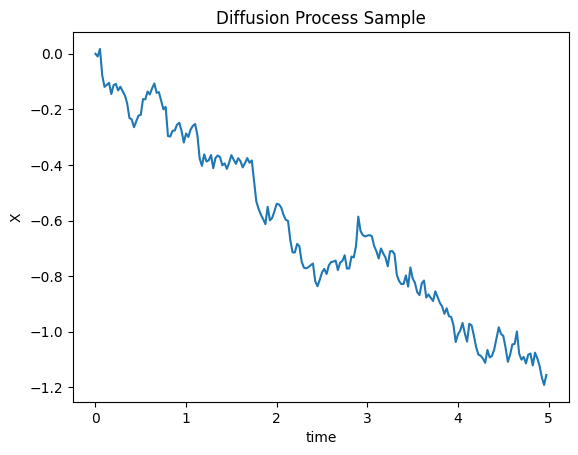

In [5]:
dp=diffusion_process(drift_coef=-0.1, diffusion_coef=0.2, init=0, terminal=200, dt=0.025)



dp.plot_sample()


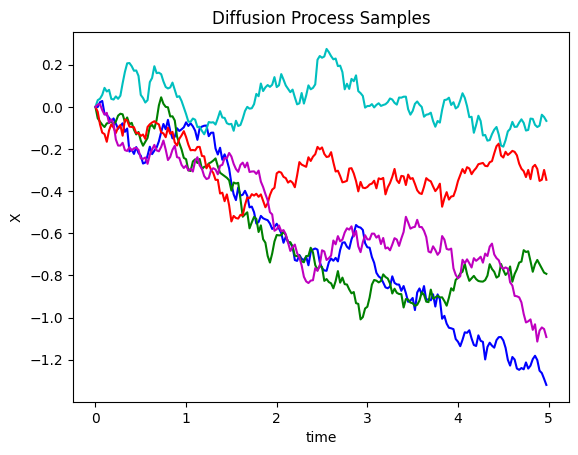

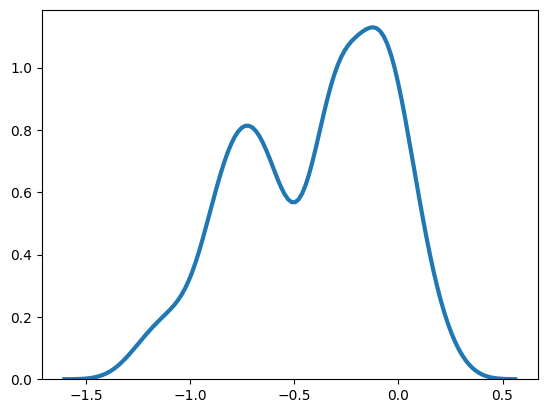

In [6]:
dp=diffusion_process(drift_coef=-0.1, diffusion_coef=0.2, init=0, terminal=200, dt=0.025)



dp.plot_samples(5)

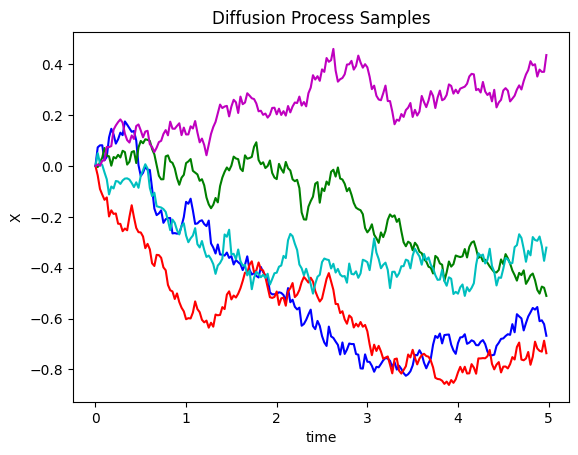

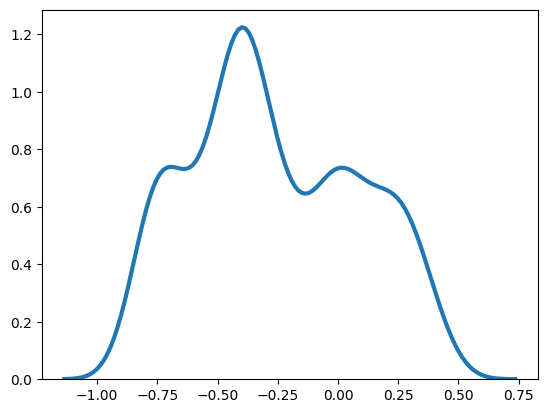

In [7]:
dp=diffusion_process(drift_coef=-0.1, diffusion_coef=0.2, init=0, terminal=200, dt=0.025)



dp.plot_samples(5)

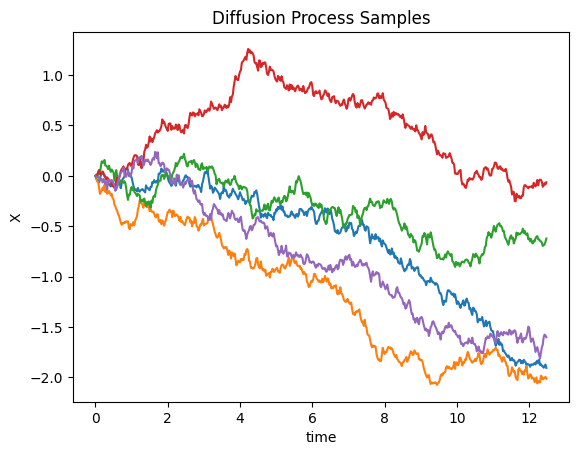

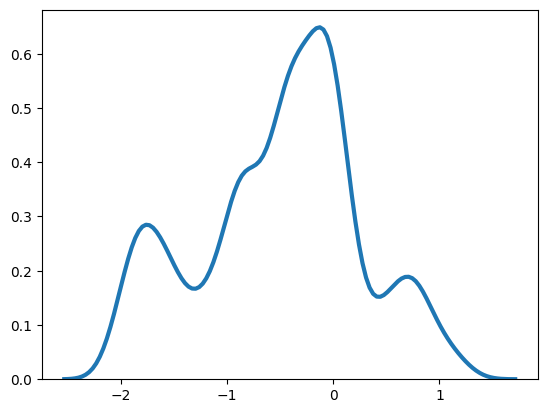

In [14]:
dp=diffusion_process(drift_coef=-0.1, diffusion_coef=0.2, init=0, terminal=500, dt=0.025)



dp.plot_samples(5)

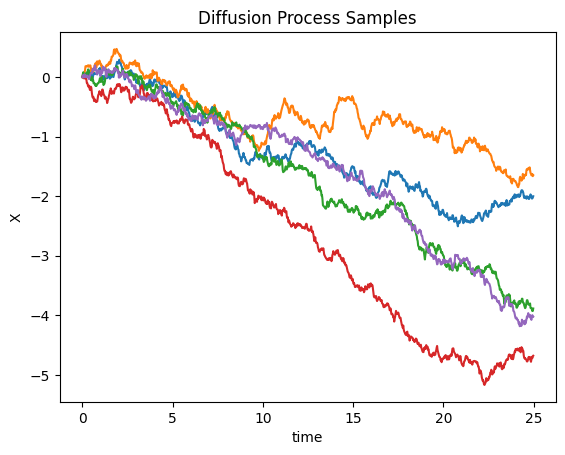

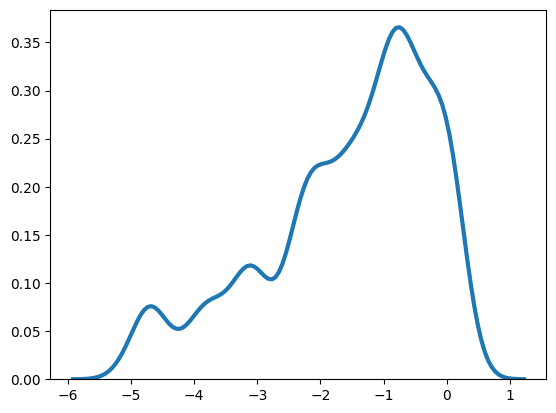

In [15]:
dp=diffusion_process(drift_coef=-0.1, diffusion_coef=0.2, init=0, terminal=1000, dt=0.025)



dp.plot_samples(5)

## Isotropic Process:

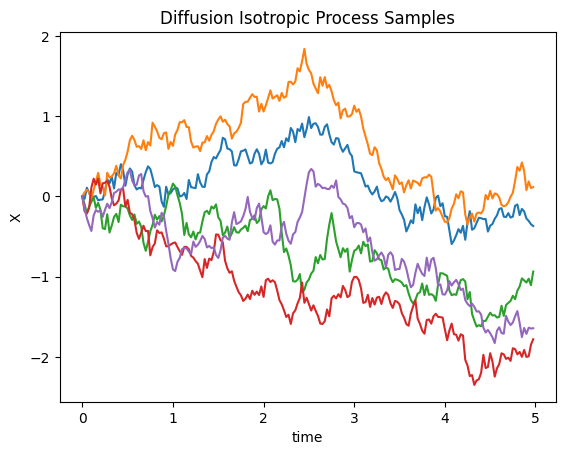

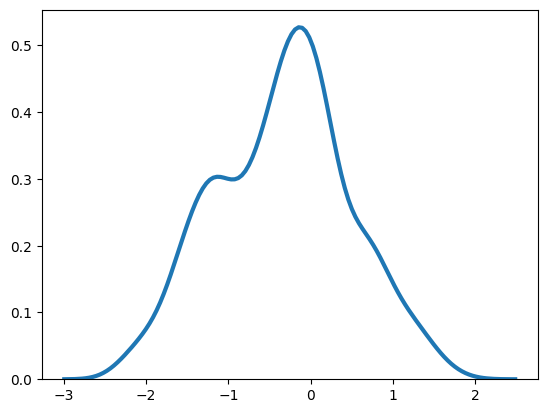

In [23]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=200, dt=0.025)



dp.plot_isotropic_samples(5)

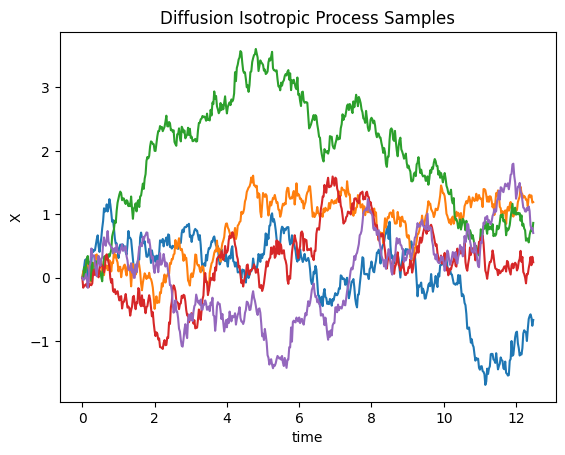

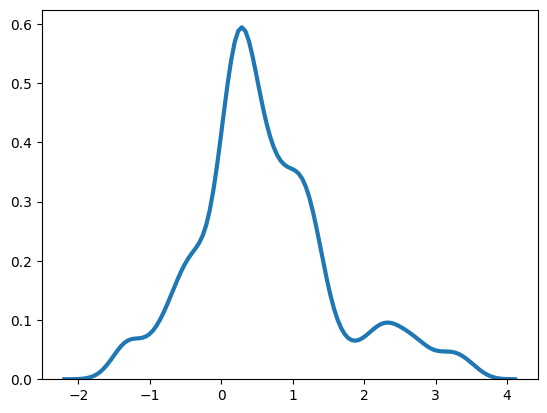

In [24]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=500, dt=0.025)



dp.plot_isotropic_samples(5)

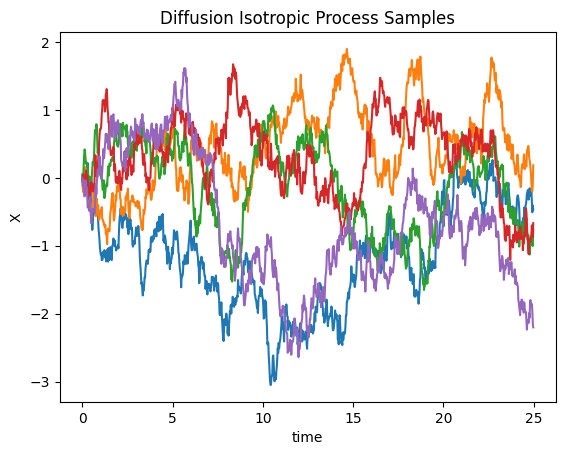

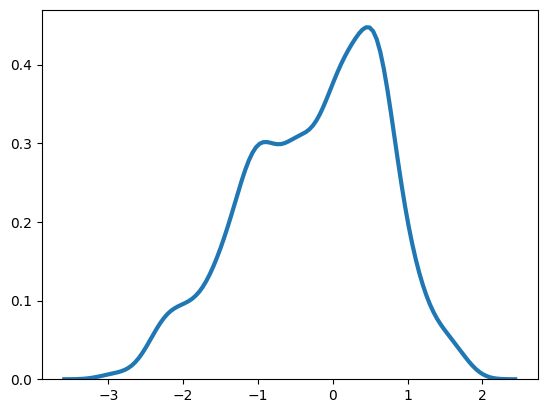

In [25]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=1000, dt=0.025)



dp.plot_isotropic_samples(5)

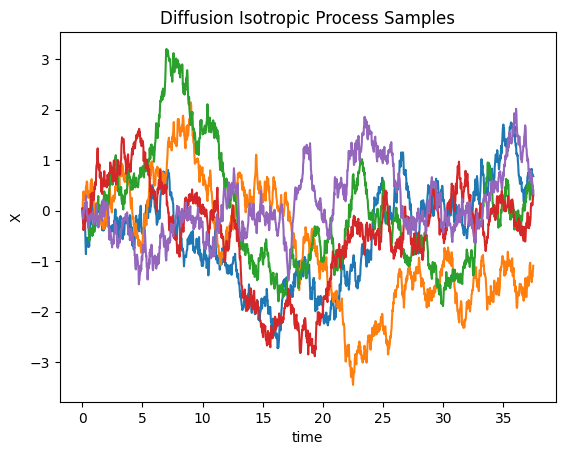

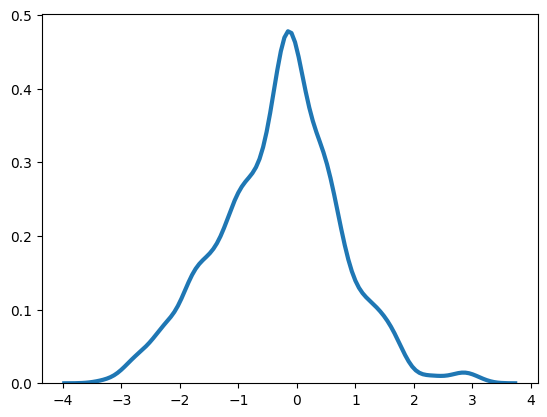

In [26]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=1500, dt=0.025)



dp.plot_isotropic_samples(5)

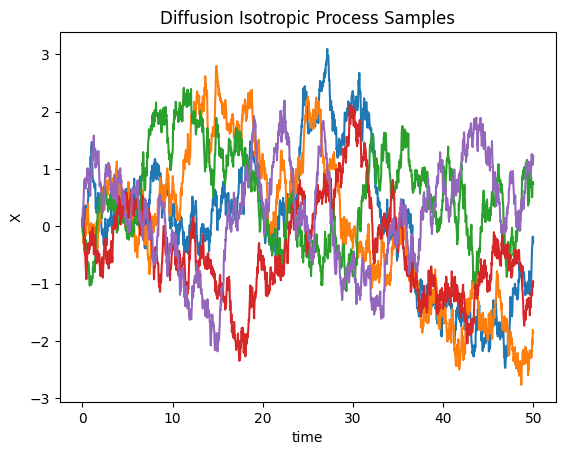

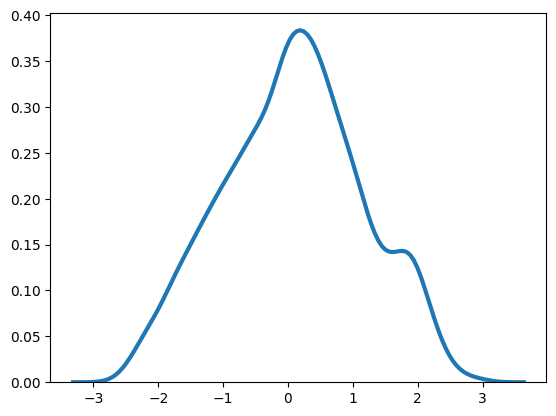

In [27]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=2000, dt=0.025)



dp.plot_isotropic_samples(5)

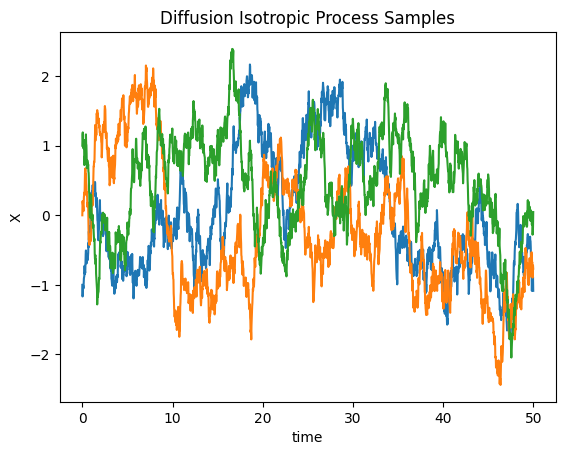

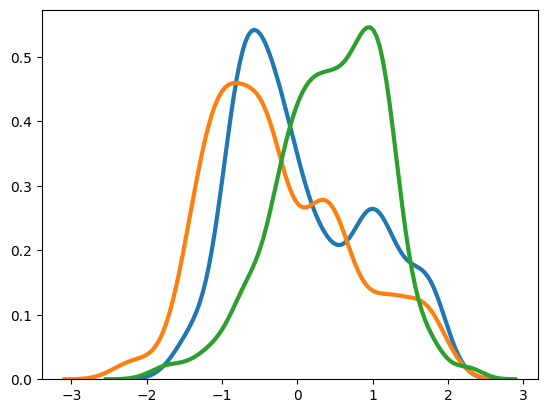

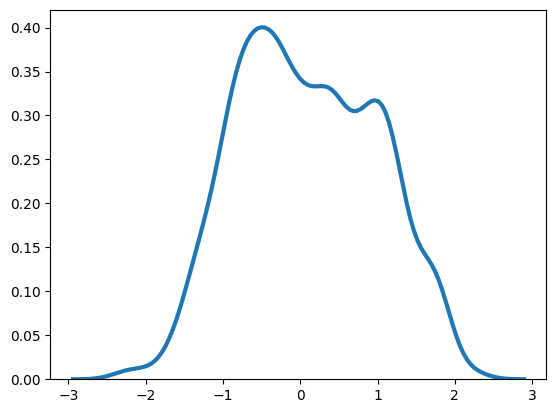

In [45]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=2000, dt=0.025)



dp.plot_isotropic_samples(3, [-1,0,1])

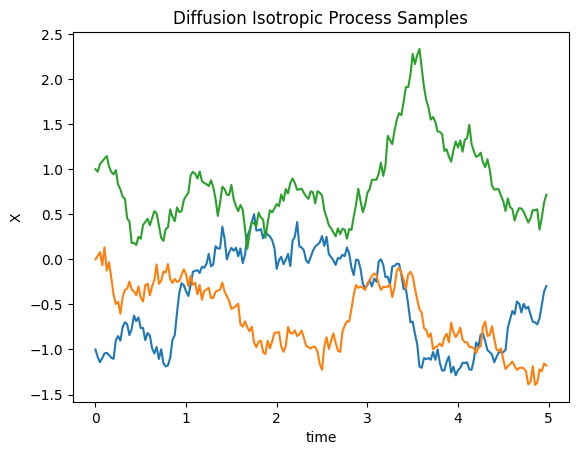

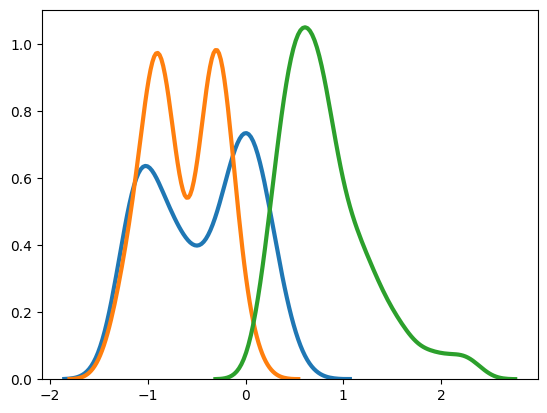

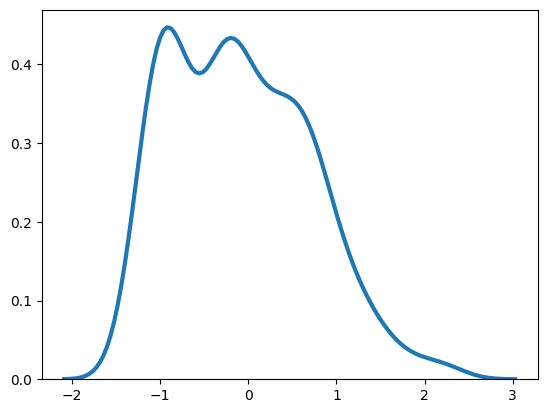

In [43]:
dp=diffusion_process(drift_coef=0.1, diffusion_coef=0.2, init=0, terminal=200, dt=0.025)



dp.plot_isotropic_samples(3, [-1,0,1])

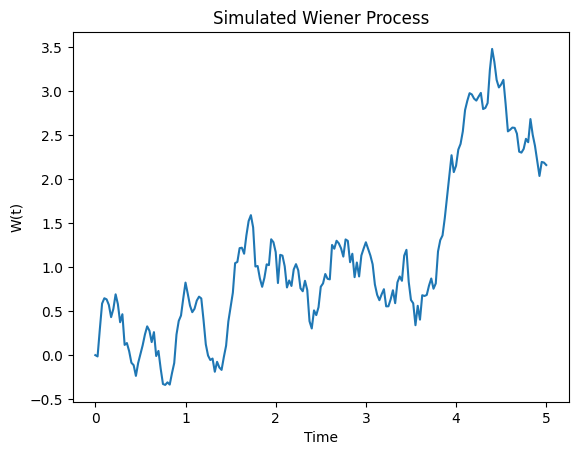

In [33]:
# Parameters
T = 5.0  # total time
N = 200  # number of time steps
dt = T / N  # time step size

# Time grid
t = np.linspace(0, T, N+1)

# Initialize the Wiener process
W = np.zeros(N+1)

# Simulate the Wiener process
for i in range(1, N+1):
    dW = np.random.normal(0, np.sqrt(dt))  # increment of the Wiener process
    W[i] = W[i-1] + dW

# Plot the process
plt.plot(t, W)
plt.title('Simulated Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.show()